<a href="https://colab.research.google.com/github/harsh-tambi/LSTM_nONLINEAR/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam


In [10]:
series = np.sin((0.1*np.arange(400))**2)

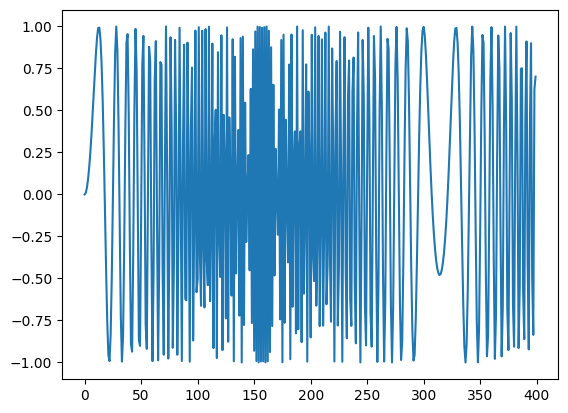

In [11]:
plt.plot(series)
plt.show()

In [12]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)


X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)


In [13]:
i = Input(shape = (T, 1))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)


r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
7/7 [==============================] - 1s 28ms/step - loss: 1.0011 - val_loss: 0.8728
Epoch 2/80
7/7 [==============================] - 0s 10ms/step - loss: 0.9905 - val_loss: 0.8667
Epoch 3/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9848 - val_loss: 0.8607
Epoch 4/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9711 - val_loss: 0.8547
Epoch 5/80
7/7 [==============================] - 0s 10ms/step - loss: 0.9752 - val_loss: 0.8488
Epoch 6/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9593 - val_loss: 0.8430
Epoch 7/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9592 - val_loss: 0.8373
Epoch 8/80
7/7 [==============================] - 0s 10ms/step - loss: 0.9534 - val_loss: 0.8317
Epoch 9/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9477 - val_loss: 0.8262
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.9402 - val_loss: 0.8207
Epoch 11/80
7/7 [==================

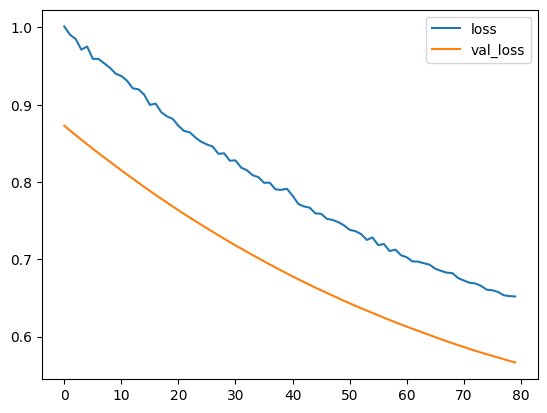

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

13/13 [==============================] - 0s 2ms/step


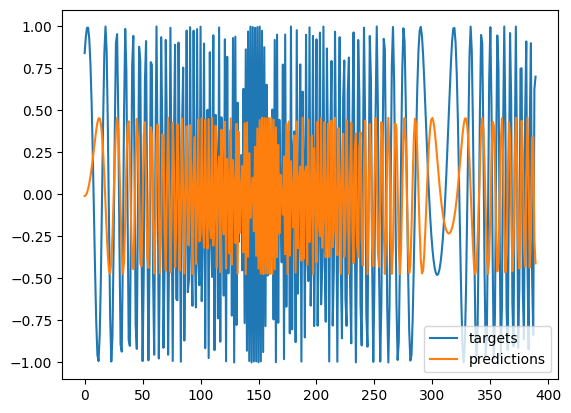

In [15]:
outputs = model.predict(X)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()
